# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Dennis Zaramelo Felex - 2°C </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
df.columns = ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'MagnitudeType', 'MagnitudeError', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'MagnitudeType', 'MagnitudeError', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,MagnitudeType,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
df['Hemisfério'] = 0
df.loc[(df.Latitude > 0), "Hemisfério"] = "Norte"
df.loc[(df.Latitude < 0), "Hemisfério"] = "Sul"

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

5.5
9.1


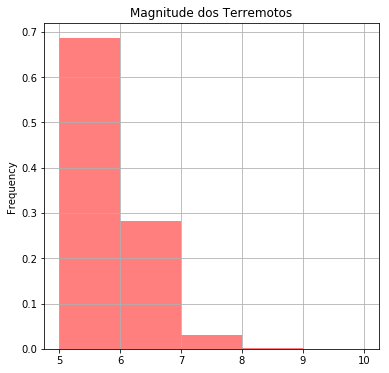

In [5]:
print (df.Magnitude.min())
print (df.Magnitude.max())

faixa=np.arange(5,11,1)

plot = df.Magnitude.plot.hist(bins=faixa,title='Magnitude dos Terremotos',figsize=(6, 6), normed=1, alpha=0.5, color='red')
plt.grid(True)

De acordo com o histograma acima, a grande maioria dos abalos sísmicos registrados estão entre 5 e 6 graus na escala Richter (quase 70% dos registros). Entre 6 e 7 graus, o valor diminui consideravelmente: apenas cerca de 30%. Entre 7 e 8%, há uma incidência de menos de 5% e, os mais intensos (8 graus ou mais) quase não aparecem no histograma de frequência relativa, indicando que são casos muito raros.  

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [18]:
print(df.Magnitude.describe())
scale = 5.882531 #média
loc = 5 #de onde a curva começa
X = expon.rvs(loc,scale,len(df.Magnitude))


count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

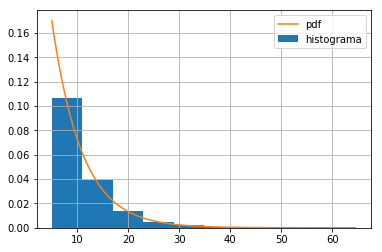

In [20]:
plt.hist(X, normed = True)
x = np.arange(X.min(), X.max(), 0.1)
plt.plot(x, expon.pdf(x, loc, scale))
plt.legend(['pdf','histograma'])
plt.grid(True)
plt.show()

A função densidade de probabilidade acompanha os valores indicados no histograma, os quais inidicam a porcentagem de ocorrências para cada intensidade de tremor.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
tabela=pd.crosstab(df.Hemisfério, df.Type, margins=True, rownames=['Hemisfério'], colnames=['Causa'], normalize=True)*100
tabela

Causa,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
0,0.004271,0.000000,0.000000,0.000000,0.004271
Norte,44.712113,0.008543,0.627883,0.000000,45.348539
Sul,54.514779,0.008543,0.119597,0.004271,54.647189
All,99.231164,0.017085,0.747480,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
p = 44.712113+0.008543+0.627883+0.000000
print("probabilidade:",p,"%")
print("Para o caso de que qualquer tremor seja considerado um terremoto")

probabilidade: 45.348539 %
Para o caso de que qualquer tremor seja considerado um terremoto


Explique o seu raciocínio

Ao verificar-se a crosstab acima, dado todo o registro de abalos sísmicos, tem-se cerca de 45,3% das ocorrências no hemisfério norte (soma-se todas as porcentagens de ocorrência nesse hemisfério. Como os valores já estão em porcentagem, não é necessário comparar com o espaço amostral novamente - todos os abalos registrados). Portanto, essa é a probabilidade de um terremoto ocorrer nesse hemisfério.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [10]:
print("A probabilidade de ter sido Nuclear Explosion é de:",0.627883/45.348539,"%")

A probabilidade de ter sido Nuclear Explosion é de: 0.013845716176214629 %


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

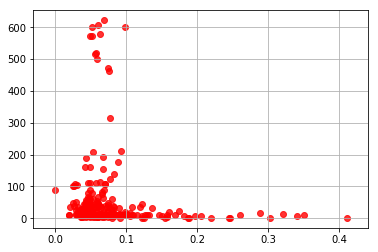

In [11]:
plt.scatter(df.MagnitudeError, df.Depth , c='red', alpha=0.8)
plt.grid(True)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [12]:
DF=df.dropna(subset=['MagnitudeError','Depth'])
print("Correlação entre Erro de Magnitude e Profundidade:",np.corrcoef(DF.MagnitudeError,DF.Depth)[0,1])


Correlação entre Erro de Magnitude e Profundidade: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

Valores próximos a +1 : indicam forte relação linear positiva entre as variáveis erro de magnitude e profundidade;
Valores próximos a -1 : indicam forte relação linear negativa entre as variáveis;
Valores próximos a zero: indicam ausência de relação linear entre as variáveis.
Com o valor de -0.07, nota-se uma relação linear praticamente inexistente entre as variáveis erro e profundidade. 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [13]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

Para os valores de latitude, tem-se o número de valores recolhidos, média e desvio-padrão, respectivamente. Após, tem-se a disposição dos valores limite para cada porcentagem indicada. Por exemplo: até 25%, colocados em ordem os valores de latitude, tem-se latitudes de até -18 graus. 

In [14]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

Assim como nos valores de Latitude, o mesmo processo foi realizado com os valores de longitude e, a disposição dos elementos é a mesma: contagem, média e desvio-padrão, bem como os valores limites para intervalos de porcentagens.

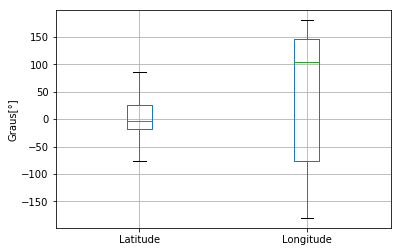

In [15]:
plot = df.boxplot(column=['Latitude','Longitude'], figsize=(8,8))
plt.ylabel("Graus[°]")

O boxplot está plotando os valores de Latitude (à esquerda) e Longitude (à direita). As linhas pretas horizontais indicam os valores limite desses conjuntos. Os retângulos (Quartis) representam 50% da amostra, sendo essa parte referente aos valores de 25% a 75% de todo o conunto (em ordem crescente). A linha verde indica exatamente a divisão entre 1° e 2° quartil, ou seja, indica o valor que está na metade (50%). 

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [16]:
#Filtrando o dataframe para analisar somente os eventos que se encaixam nessas características
tabelatipos = df[df.MagnitudeType=="MB"] 

In [17]:
filtrada = tabelatipos[tabelatipos.Type=="Nuclear Explosion"]
porcentagem=(filtrada.Hemisfério.value_counts(sort=False, normalize=True)*100).round(decimals=2)
porcentagem


Norte    82.82
Sul      17.18
Name: Hemisfério, dtype: float64

Como visto no comparativo acima, mais de 80% dos casos os quais se encaixam nas exigências do enunciado se referem ao hemisferio norte. Logo, uma ocorrência com essas características é mais provável ter acontecido no hemisfério norte.